## 202311023
## Samarth Motka
## Lab 9

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Random points

In [10]:
np.random.seed(111)
X = np.random.uniform(0, 100, 100)
noise = np.random.normal(0, 11, X.shape)
y = 4 * X + noise

## Linear Reagression using Analytic method

In [21]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predicting using analytic method

In [22]:
X_new = np.array([[0], [100]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

## Defining loss Function

In [12]:
def compute_mse(X_b, y, theta):
    m = len(X_b)
    predictions = X_b.dot(theta)
    mse = (1/m) * np.sum((predictions - y) ** 2)
    return mse

## Using normal Gradient Descent

In [13]:
def gradient_descent(X_b, y, theta_initial, learning_rate, iterations):
    m = len(X_b)
    theta = theta_initial.copy()
    mse_history = []

    for iteration in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        mse_history.append(compute_mse(X_b, y, theta))

    return theta, mse_history

## Using Stochastic Gradient Descent

In [14]:
def stochastic_gradient_descent(X_b, y, theta_initial, learning_rate, iterations, decay_lambda=0.01):
    m = len(X_b)
    theta = theta_initial.copy()
    mse_history = []

    for iteration in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_rate / (1 + decay_lambda * iteration)
            theta = theta - eta * gradients
        mse_history.append(compute_mse(X_b, y, theta))

    return theta, mse_history

## Performing Algorithms with initializations

In [15]:
theta_initial = np.random.randn(2,1)
learning_rate = 0.0001
iterations = 100

# Doing Gradient Descent
theta_gd, mse_history_gd = gradient_descent(X_b, y, theta_initial, learning_rate, iterations)

# Doing Stochastic Gradient Descent
theta_sgd, mse_history_sgd = stochastic_gradient_descent(X_b, y, theta_initial, learning_rate, iterations)


## Ploting Graphs

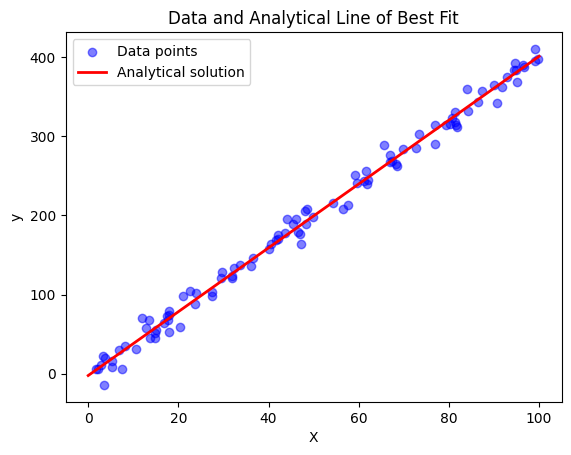

In [23]:
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Analytical solution')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Analytical Line of Best Fit')
plt.legend()
plt.show()

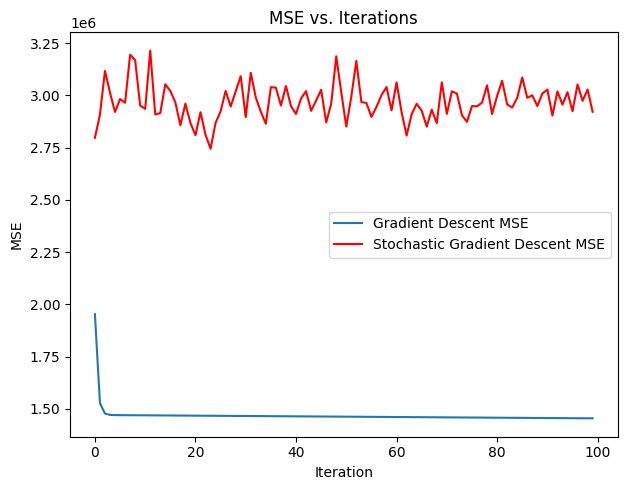

In [27]:

# Plotting the results
plt.figure(figsize=(12, 5))

# Plotting Gradient Descent MSE
plt.subplot(1, 2, 1)
plt.plot(mse_history_gd, label='Gradient Descent MSE')
plt.plot(mse_history_sgd, label='Stochastic Gradient Descent MSE', color='red')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iterations')
plt.legend()

plt.tight_layout()
plt.show()

## Plotting

In [30]:
plt.figure(figsize=(12, 5))

# Gradient Descent
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='red')
for theta in gradient_descent(X_b, y):
    plt.plot(X, X_b.dot(theta), color='red', alpha=0.1)
plt.title('Linear Regression (Gradient Descent)')


plt.figure(figsize=(12, 5))
# Stochastic Gradient Descent
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='orange')
for theta in stochastic_gradient_descent(X_b, y):
    plt.plot(X, X_b.dot(theta), color='red', alpha=0.1)
plt.title('Linear Regression (Stochastic Gradient Descent)')


plt.show()


## Part 2: Gradient Descent and Newton’s Method (Hessian Based) For logistic regression Choose a classification data set of your choice. Train a logistic regression model on this dataset using stochastic gradient descent and Newton’s method from scratch. Plot the loss vs iterations for both algorithms.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)






Function defining

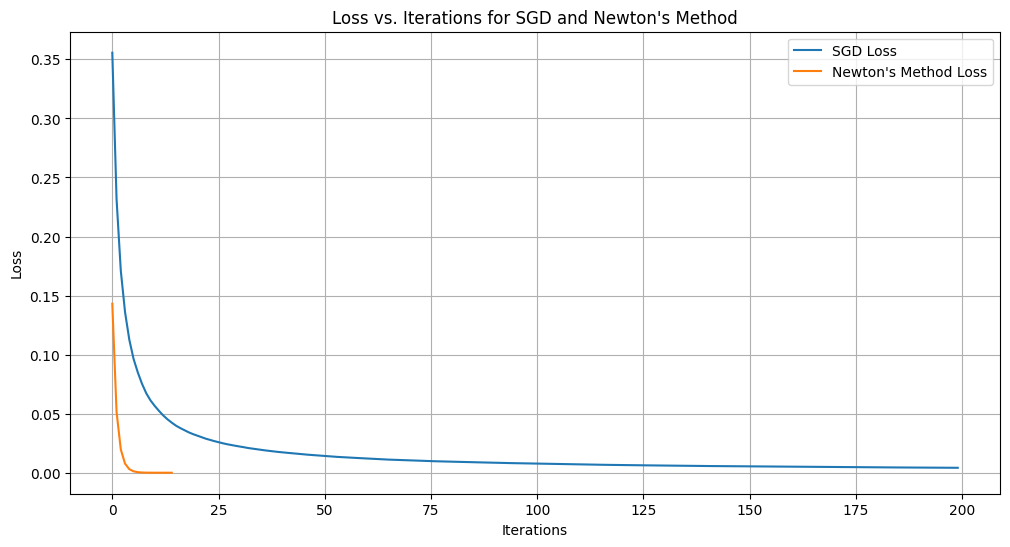

In [33]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(X, y, theta):
    z = np.dot(X, theta)
    predicted = sigmoid(z)
    loss = -np.mean(y * np.log(predicted + 1e-9) + (1 - y) * np.log(1 - predicted + 1e-9))  # add epsilon to avoid log(0)
    return loss

# Gradient of the loss function
def compute_gradient(X, y, theta):
    z = np.dot(X, theta)
    predicted = sigmoid(z)
    gradient = np.dot(X.T, (predicted - y))
    if X.ndim > 1:
        gradient /= X.shape[0]
    return gradient

# Implement Stochastic Gradient Descent (SGD)
def sgd(X, y, learning_rate=0.1, epochs=100):
    theta = np.zeros(X.shape[1])
    losses = []
    for epoch in range(epochs):
        for i in range(len(y)):
            idx = np.random.randint(0, len(y))
            X_i = X[idx].reshape(1, -1)
            y_i = y[idx]
            gradient = compute_gradient(X_i, y_i, theta)
            theta -= learning_rate * gradient
        losses.append(compute_loss(X, y, theta))
    return theta, losses




# Hessian matrix of the loss function
def compute_hessian(X, y, theta):
    z = np.dot(X, theta)
    predicted = sigmoid(z)
    diag = predicted * (1 - predicted)
    H = np.dot(X.T * diag, X) / len(y)
    return H

# Implement Stochastic Gradient Descent (SGD)
def sgd(X, y, learning_rate=0.1, epochs=100):
    theta = np.zeros(X.shape[1])
    losses = []
    for epoch in range(epochs):
        for i in range(len(y)):
            idx = np.random.randint(0, len(y))
            X_i = X[idx].reshape(1, -1)
            y_i = y[idx]
            gradient = compute_gradient(X_i, y_i, theta)
            theta -= learning_rate * gradient
        losses.append(compute_loss(X, y, theta))
    return theta, losses

# Implement Newton's Method
def newtons_method(X, y, epochs=10):
    theta = np.zeros(X.shape[1])
    losses = []
    for epoch in range(epochs):
        gradient = compute_gradient(X, y, theta)
        H = compute_hessian(X, y, theta)
        theta -= np.linalg.inv(H) @ gradient
        losses.append(compute_loss(X, y, theta))
    return theta, losses


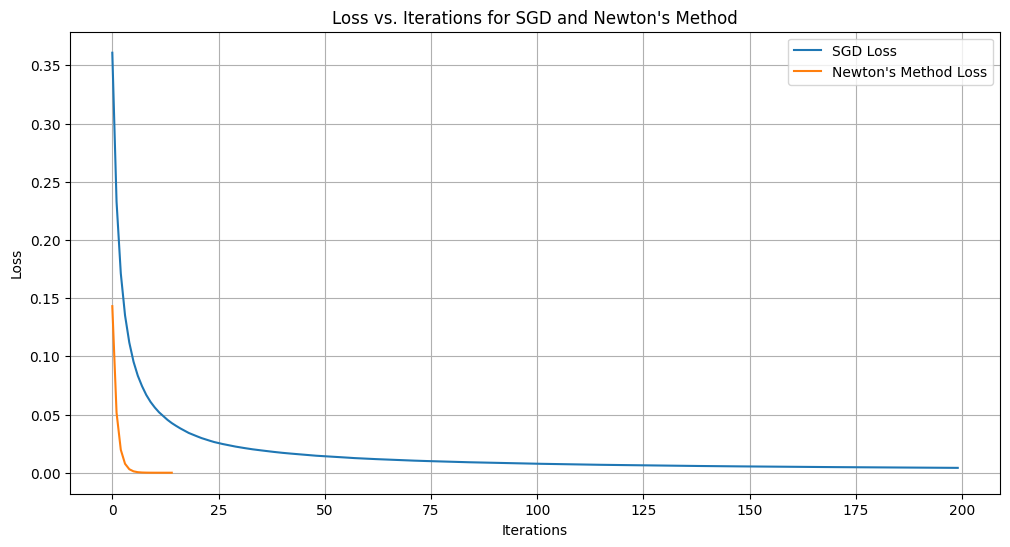

In [36]:
# Train models again after the fix
theta_sgd, losses_sgd = sgd(X_train, y_train, learning_rate=0.01, epochs=200)
theta_newton, losses_newton = newtons_method(X_train, y_train, epochs=15)

# Plotting the results again
plt.figure(figsize=(12, 6))
plt.plot(losses_sgd, label='SGD Loss')
plt.plot(np.arange(len(losses_newton)), losses_newton, label='Newton\'s Method Loss')
plt.title('Loss vs. Iterations for SGD and Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Testing

In [34]:
theta_sgd, losses_sgd = sgd(X_train, y_train, learning_rate=0.01, epochs=200)
theta_newton, losses_newton = newtons_method(X_train, y_train, epochs=15)



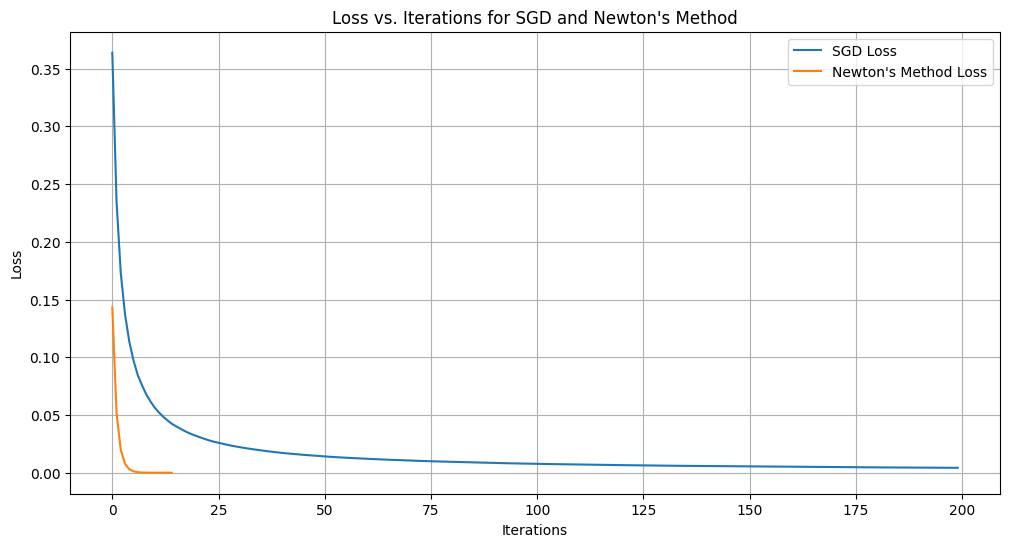

In [35]:



plt.figure(figsize=(12, 6))
plt.plot(losses_sgd, label='SGD Loss')
plt.plot(np.arange(len(losses_newton)), losses_newton, label='Newton\'s Method Loss')
plt.title('Loss vs. Iterations for SGD and Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Newton's method is highly effective for datasets where its computational cost is ok. It is  useful when high precision is required, and the computational resources allow for its more expensive iterations. On the other hand, SGD offers more flexibility and scalability, making it suitable for larger datasets despite requiring more iterations to converge. ​